# Social Network Analysis by using NetworkX

We use the module NetworkX in this project. It is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

### Importing Libraries

In [1]:
import networkx as nx # for analysis of social networks
import matplotlib.pyplot as plt # for visualization 
%matplotlib inline
# import warnings; warnings.simplefilter('ignore')

 there are some types of Social Networks
 
 ### 1- Symmetric Networks (undirected)
The first network that we create is a group of people who work together. This is called a symmetric network because the relationship “working together” is a symmetric relationship: If A is related to B, B is also related to A.

In [2]:
G_symmetric = nx.Graph()

G_symmetric.add_edge('Steven',  'Laura')
G_symmetric.add_edge('Steven',  'Marc')
G_symmetric.add_edge('Steven',  'John')
G_symmetric.add_edge('Steven',  'Michelle')
G_symmetric.add_edge('Laura',   'Michelle')
G_symmetric.add_edge('Michelle','Marc')
G_symmetric.add_edge('George',  'John')
G_symmetric.add_edge('George',  'Steven')

In [3]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


Now lets visualize the network we formed above

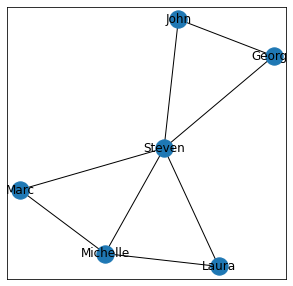

In [4]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric)

### 2 Asymmetric Networks (directed)

What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric. This is the case if someone follows someone else on Twitter. Or in the case of hyperlinks.

If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network.

In [5]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

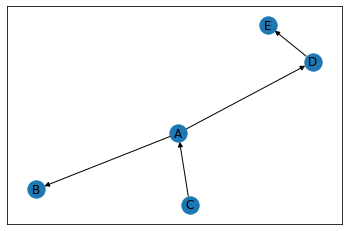

In [6]:
# let visualize the Asymmetric Network
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

### 3 Weighted Networks

Till now we had networks without weights, but it is possible that networks are made with weights, for example, if in our initial network we consider the number of projects done together as a weight, we will get a weighted Network.

In [7]:
G_weighted = nx.Graph()

G_weighted.add_edge('Steven',  'Laura',   weight=25)
G_weighted.add_edge('Steven',  'Marc',    weight=8)
G_weighted.add_edge('Steven',  'John',    weight=11)
G_weighted.add_edge('Steven',  'Michelle',weight=1)
G_weighted.add_edge('Laura',   'Michelle',weight=1)
G_weighted.add_edge('Michelle','Marc',    weight=1)
G_weighted.add_edge('George',  'John',    weight=8)
G_weighted.add_edge('George',  'Steven',  weight=4)

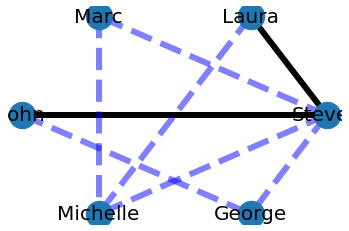

In [8]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall,width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show();

### Clustering coefficient
It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters.

We can determine the clusters of a node, local clustering coefficient, which is the fraction of pairs of the node’s friends (that is connections) that are connected with each other.

To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In [9]:
nx.clustering(G_symmetric,'Michelle')

0.6666666666666666

In [10]:
nx.clustering(G_symmetric,'Laura')

1.0

In [11]:
nx.average_clustering(G_symmetric)

0.8277777777777778

Now let's implement Network Basis Measures
### Degree

Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.


In [13]:
# The degree function returned 3, this is because Michelle has worked with 3 people
nx.degree(G_symmetric, 'Michelle')

3

### Distance
We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.

In [14]:
nx.shortest_path(G_symmetric, 'Michelle', 'John')

['Michelle', 'Steven', 'John']

In [15]:
nx.shortest_path_length(G_symmetric, 'Michelle', 'John')

2

### Breadth-first search
We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function bfs_tree to do it.

And so if you use M = nx.bfs_tree(G_symmetric, 'Michelle') and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Michelle .

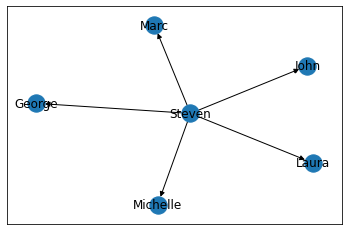

In [16]:
S = nx.bfs_tree(G_symmetric, 'Steven')
nx.draw_networkx(S)

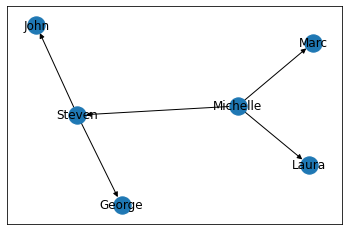

In [17]:
M = nx.bfs_tree(G_symmetric, 'Michelle')
nx.draw_networkx(M)

### Eccentricity
Eccentricity of a node A is defined as the largest distance between A and all other nodes.

It can be found using nx.eccentricity() function. In the symmetric employee-network, Michelle has an eccentricity of 2, and Steven has an eccentricity of 1 (he is connected to every other node).

In [18]:
nx.eccentricity(G_symmetric,'Michelle')

2

In [19]:
nx.eccentricity(G_symmetric,'Steven')

1

### Degree Centrality

In [22]:
nx.degree_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.4,
 'Marc': 0.4,
 'John': 0.4,
 'Michelle': 0.6000000000000001,
 'George': 0.4}

### Eigenvector Centrality

In [23]:
nx.eigenvector_centrality(G_symmetric)

{'Steven': 0.6006686104947806,
 'Laura': 0.3545677660798074,
 'Marc': 0.3545677660798074,
 'John': 0.30844592433424667,
 'Michelle': 0.4443904166426225,
 'George': 0.30844592433424667}

### Closeness Centrality

In [24]:
nx.closeness_centrality(G_symmetric)

{'Steven': 1.0,
 'Laura': 0.625,
 'Marc': 0.625,
 'John': 0.625,
 'Michelle': 0.7142857142857143,
 'George': 0.625}

### Betweenness Centrality
The Betweenness Centrality is the centrality of control.

In [25]:
nx.betweenness_centrality(G_symmetric)

{'Steven': 0.65,
 'Laura': 0.0,
 'Marc': 0.0,
 'John': 0.0,
 'Michelle': 0.05,
 'George': 0.0}

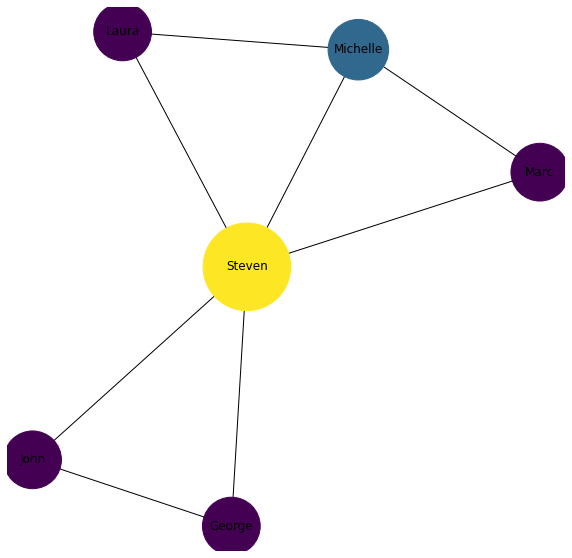

In [26]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

Now lets jump into the real thing, we are going to conduct the case study on facebook to anaylze the netwoek
# Facebook Case Study
This dataset consists of ‘circles’ (or ‘friends lists’) from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

In [27]:
import pandas as pd

df = pd.read_csv('facebook_combined.txt')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0 1     88233 non-null  object
dtypes: object(1)
memory usage: 689.4+ KB


In [29]:
df.head()

0 1
0  0 2
1  0 3
2  0 4
3  0 5
4  0 6

In [30]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [31]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


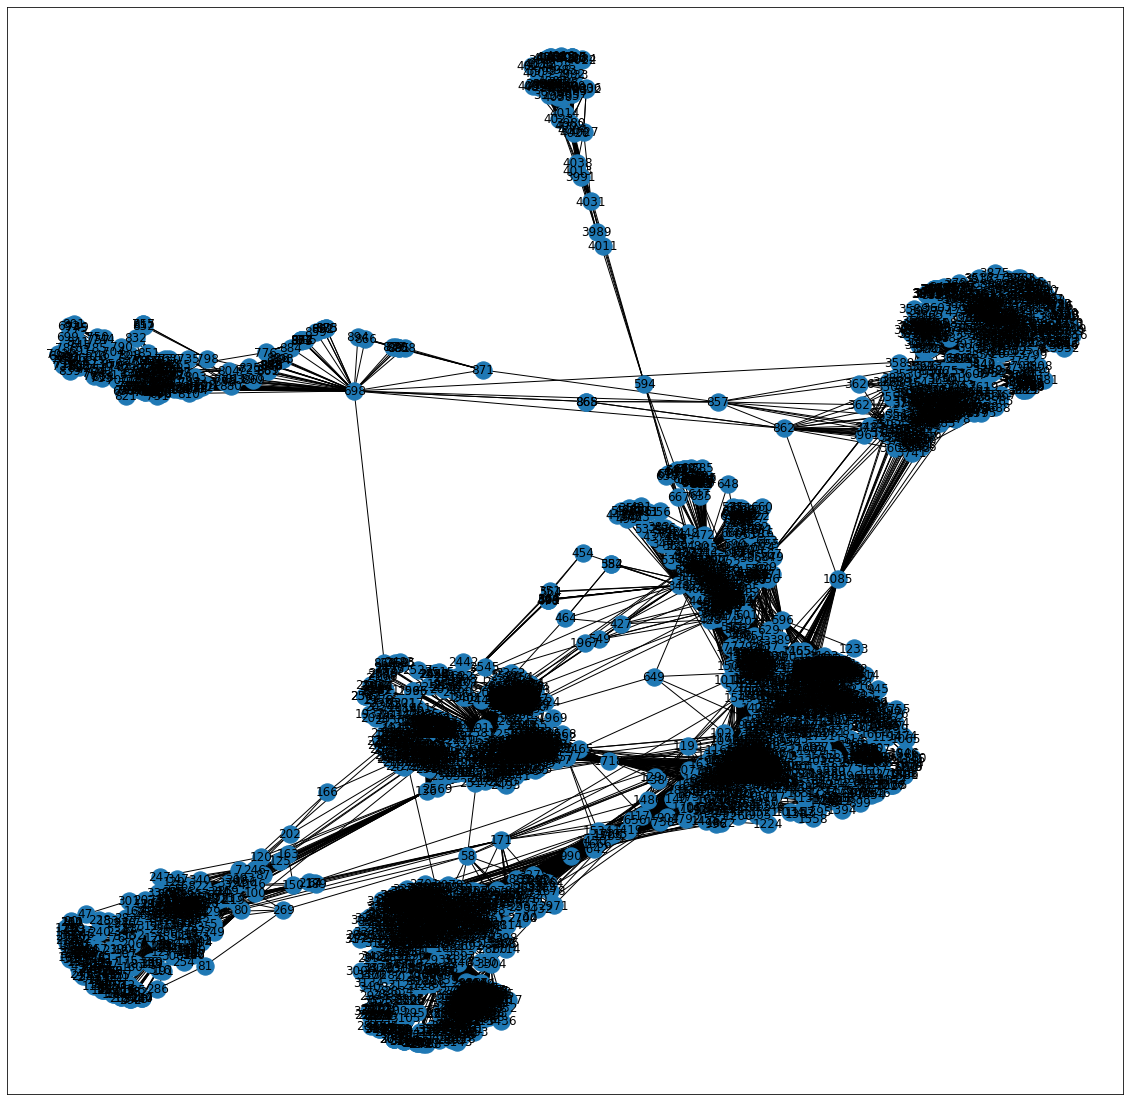

In [32]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

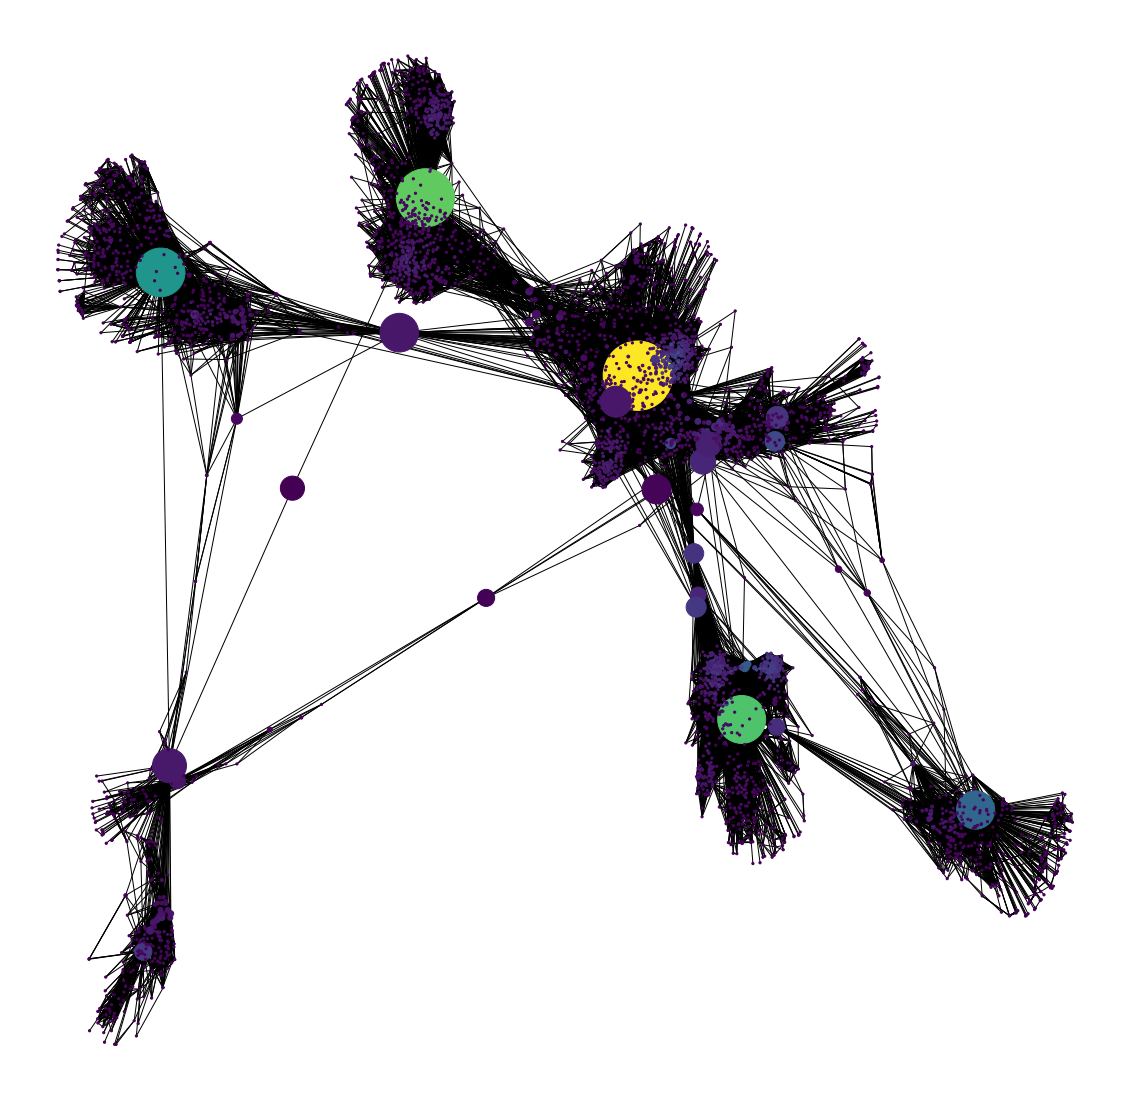

In [33]:
# lets visualize it with degree 
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [34]:
# You can also know the labels of the nodes with the highest betweenness centrality using:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]